In [49]:
%pylab inline
import pandas as pd
import numpy as np
import os
from customTypes import ThreadType
import thermocouple

Populating the interactive namespace from numpy and matplotlib


In [32]:
d=os.path.expanduser("~")
d=os.path.join(d,"Desktop", "Data")

In [33]:
temp_dir = os.path.join(d, "Temperature")
pres1_dir = os.path.join(d, "Pressure1")
pres2_dir = os.path.join(d, "Pressure2")

In [34]:
datetime = "20191227163243"
filename = "out_" + datetime + ".csv"
filename

'out_20191227163243.csv'

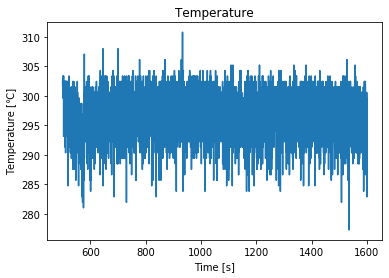

In [82]:
""" temperature """
temp_csv = pd.read_csv(temp_dir + "/" + filename)
plt.title("Temperature")
plt.xlabel("Time [s]")
plt.ylabel("Temperature [℃]")
xy = ThreadType.TEMPERATURE.getCalcArray(np.array(temp_csv))
xy = np.array([i for i in xy if i[1] > 250])
              
xy = np.array([i for i in xy if i[0] > 500 and i[0] < 1600])
plt.plot(xy[:, 0], xy[:, 1])

(26735, 3)
(18555, 3)


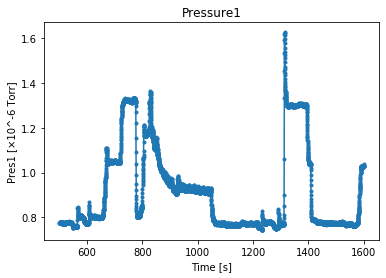

In [136]:
""" pressure1 """
pres1_csv = pd.read_csv(pres1_dir + "/" + filename)
plt.title("Pressure1")
plt.xlabel("Time [s]")
plt.ylabel("Pres1 [×10^-6 Torr]")
xy = ThreadType.PRESSURE1.getCalcArray(np.array(pres1_csv))
print(xy.shape)
xy = np.array([i for i in xy if i[1] < 2 and i[1] > 0.05])
print(xy.shape)
              
xy = np.array([i for i in xy if i[0] > 500 and i[0] < 1600])
plt.plot(xy[:, 0], xy[:, 1],".-")

In [125]:
%timeit mask = np.where(xy[:,1]>0.2)

9.99 µs ± 274 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [121]:
%timeit np.array([i for i in xy if i[1] < 2 and i[1] > 0.2])

9.7 ms ± 90.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


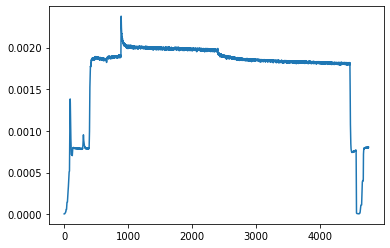

In [126]:
mask = np.where(xy[:,1]<0.2)
plot(xy[:,1][mask])


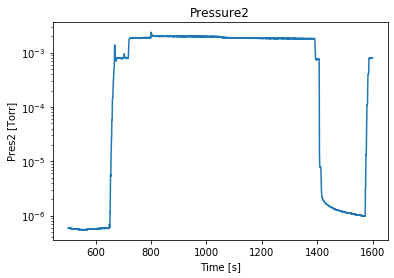

In [142]:
""" pressure2 """
pres2_csv = pd.read_csv(pres2_dir + "/" + filename)
plt.title("Pressure2")
plt.xlabel("Time [s]")
plt.ylabel("Pres2 [Torr]")
xy = ThreadType.PRESSURE2.getCalcArray(np.array(pres2_csv))
xy = np.array([i for i in xy if i[1] > 0.0000004])
              
xy = np.array([i for i in xy if i[0] > 500 and i[0] < 1600])
plt.plot(xy[:, 0], xy[:, 1])
yscale("log")